In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取titanic.txt数据
titanic_data = pd.read_csv('titanic.txt')

# 显示数据的前几行
print("数据集前5行：")
print(titanic_data.head())

# 显示数据基本信息
print("\n数据集基本信息：")
print(titanic_data.info())

# 显示数据统计摘要
print("\n数据统计摘要：")
print(titanic_data.describe())


数据集前5行：
   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  

In [2]:
# 提取需要的列：pclass, age, sex 和 survived
selected_features = titanic_data[['pclass', 'age', 'sex', 'survived']].copy()

# 检查是否有缺失值
print("\n各列的缺失值数量：")
print(selected_features.isnull().sum())

# 处理缺失值
# 对于年龄(age)列，使用均值填充缺失值
selected_features['age'] = selected_features['age'].fillna(selected_features['age'].mean())




各列的缺失值数量：
pclass        0
age         680
sex           0
survived      0
dtype: int64



乘客等级(pclass)对生存率的影响：
pclass
1st    0.599379
2nd    0.425000
3rd    0.192686
Name: survived, dtype: float64


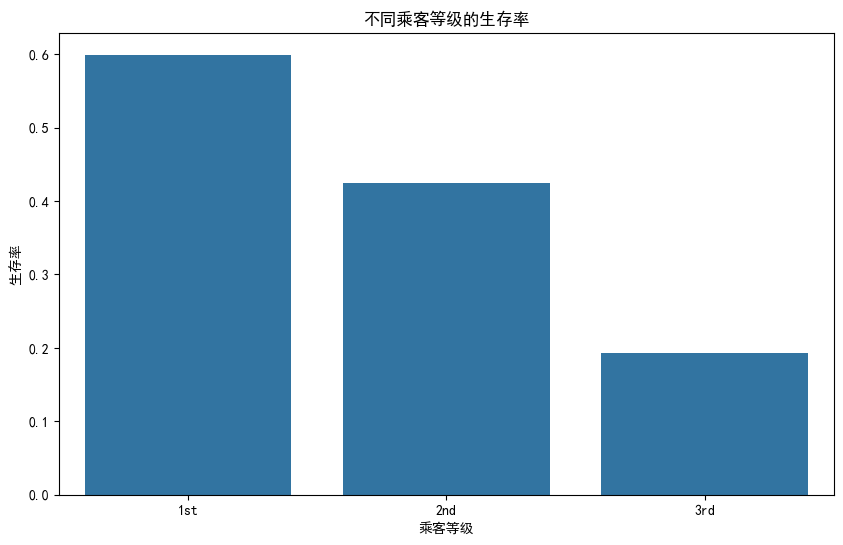

In [3]:
# 分析乘客等级(pclass)对生存率的影响
print("\n乘客等级(pclass)对生存率的影响：")

# 计算不同乘客等级的生存率
pclass_survival = selected_features.groupby('pclass')['survived'].mean()
print(pclass_survival)

plt.figure(figsize=(10, 6))
sns.barplot(x=pclass_survival.index, y=pclass_survival.values)
plt.title('不同乘客等级的生存率')
plt.xlabel('乘客等级')
plt.ylabel('生存率')
plt.show()


性别(sex)对生存率的影响：
sex
female    0.663067
male      0.167059
Name: survived, dtype: float64


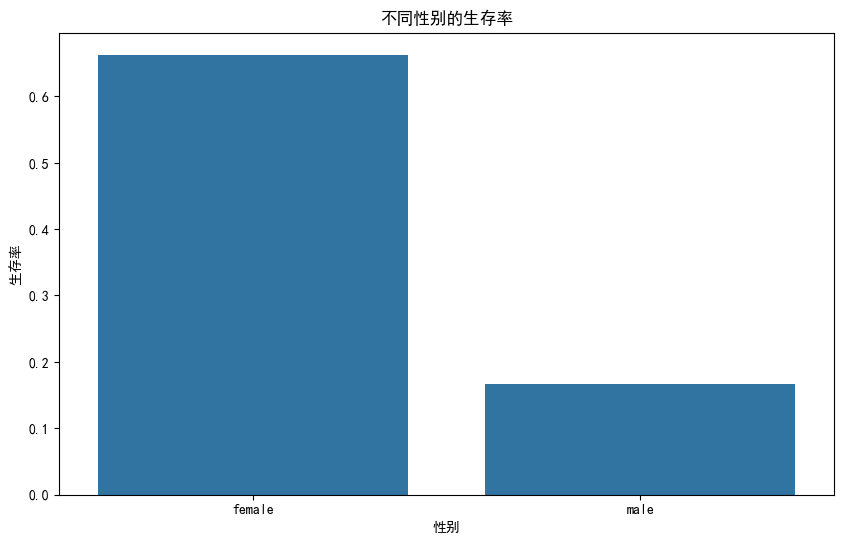

In [4]:
# 分析性别(sex)对生存率的影响
print("\n性别(sex)对生存率的影响：")

# 计算不同性别的生存率
sex_survival = selected_features.groupby('sex')['survived'].mean()
print(sex_survival)

# 可视化不同性别的生存率
plt.figure(figsize=(10, 6))
sns.barplot(x=sex_survival.index, y=sex_survival.values)
plt.title('不同性别的生存率')
plt.xlabel('性别')
plt.ylabel('生存率')
plt.show()



年龄(age)对生存率的影响：
age_group
(0, 12]      0.692308
(12, 18]     0.490909
(18, 35]     0.290224
(35, 60]     0.477833
(60, 100]    0.190476
Name: survived, dtype: float64


C:\Users\ArkhamCraft\AppData\Local\Temp\ipykernel_48492\641504457.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = selected_features.groupby('age_group')['survived'].mean()


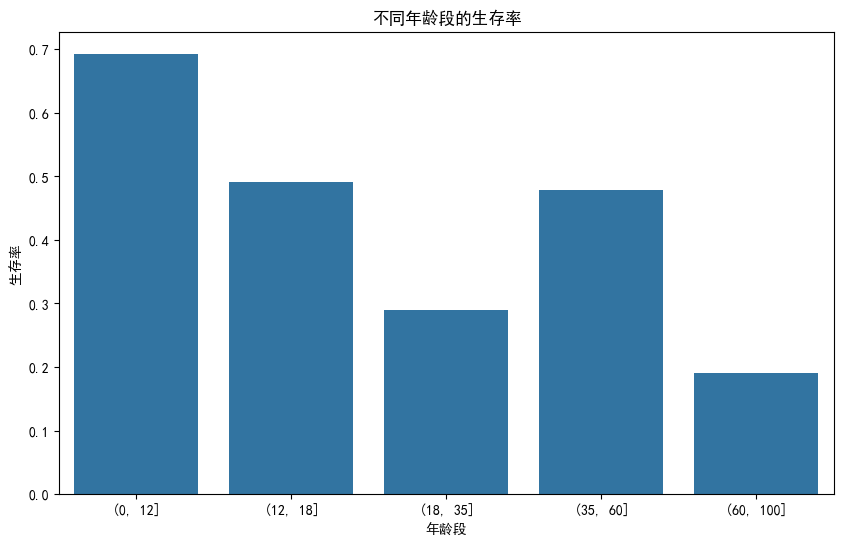


男性和女性的数量统计：
sex
male      850
female    463
Name: count, dtype: int64

性别比例（%）：
sex
male      64.737243
female    35.262757
Name: proportion, dtype: float64


In [5]:
# 分析年龄(age)对生存率的影响
print("\n年龄(age)对生存率的影响：")

# 创建年龄段
age_bins = [0, 12, 18, 35, 60, 100]
selected_features['age_group'] = pd.cut(selected_features['age'], bins=age_bins)

# 计算不同年龄段的生存率
age_survival = selected_features.groupby('age_group')['survived'].mean()
print(age_survival)

# 可视化不同年龄段的生存率
plt.figure(figsize=(10, 6))
sns.barplot(x=age_survival.index, y=age_survival.values)
plt.title('不同年龄段的生存率')
plt.xlabel('年龄段')
plt.ylabel('生存率')
plt.show()
# 分析男性和女性的数量
print("\n男性和女性的数量统计：")

# 计算不同性别的数量
sex_counts = selected_features['sex'].value_counts()
print(sex_counts)

# 计算性别比例
sex_percentage = selected_features['sex'].value_counts(normalize=True) * 100
print("\n性别比例（%）：")
print(sex_percentage)



使用决策树进行分析：
模型准确率: 0.8426

分类报告:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       245
           1       0.96      0.61      0.75       149

    accuracy                           0.84       394
   macro avg       0.88      0.80      0.82       394
weighted avg       0.86      0.84      0.83       394


混淆矩阵:
[[241   4]
 [ 58  91]]


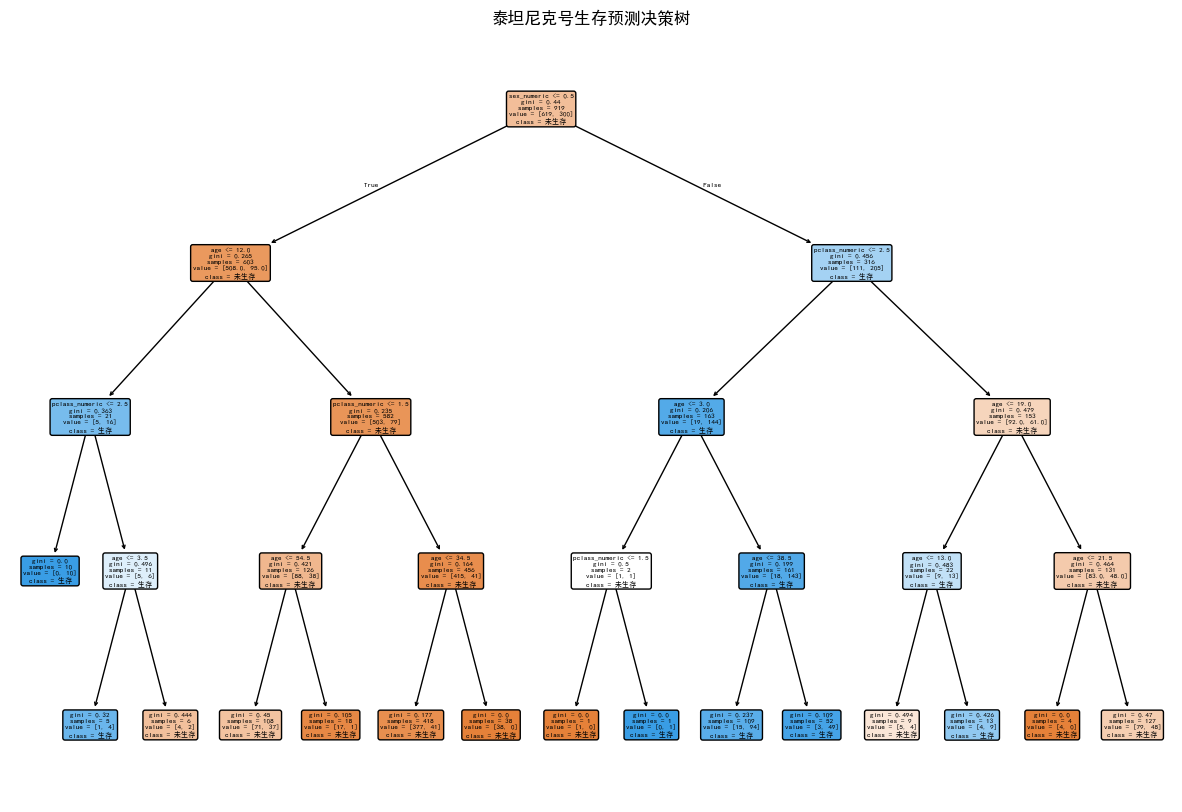

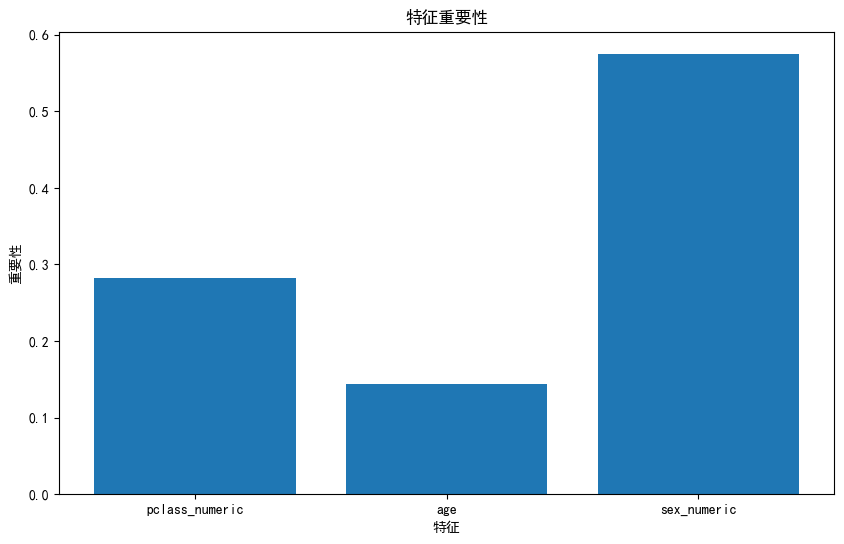

In [6]:
# 将性别(sex)特征转换为数值
selected_features['sex_numeric'] = selected_features['sex'].map({'male': 0, 'female': 1})
# 删除age_group列，因为我们已经有了age列
if 'age_group' in selected_features.columns:
    selected_features = selected_features.drop('age_group', axis=1)
# 删除含有缺失值的行
selected_features = selected_features.dropna()
# 将pclass转换为数值类型
selected_features['pclass_numeric'] = selected_features['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
selected_features
# %% cell 7 code

# 使用决策树对数据进行分析
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

print("使用决策树进行分析：")

# 准备特征和目标变量
X = selected_features[['pclass_numeric', 'age', 'sex_numeric']]
y = selected_features['survived']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)

# 训练模型
dt_classifier.fit(X_train, y_train)

# 预测
y_pred = dt_classifier.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.4f}")

# 打印分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred))

# 打印混淆矩阵
print("\n混淆矩阵:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# 可视化决策树
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_classifier, 
               feature_names=X.columns, 
               class_names=['未生存', '生存'],
               filled=True, 
               rounded=True)
plt.title("泰坦尼克号生存预测决策树")
plt.show()

# 特征重要性
feature_importance = dt_classifier.feature_importances_
feature_names = X.columns

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('特征重要性')
plt.xlabel('特征')
plt.ylabel('重要性')
plt.show()



随机森林模型准确率: 0.8350

随机森林分类报告:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       245
           1       0.94      0.60      0.73       149

    accuracy                           0.84       394
   macro avg       0.87      0.79      0.81       394
weighted avg       0.85      0.84      0.83       394


随机森林混淆矩阵:
[[239   6]
 [ 59  90]]


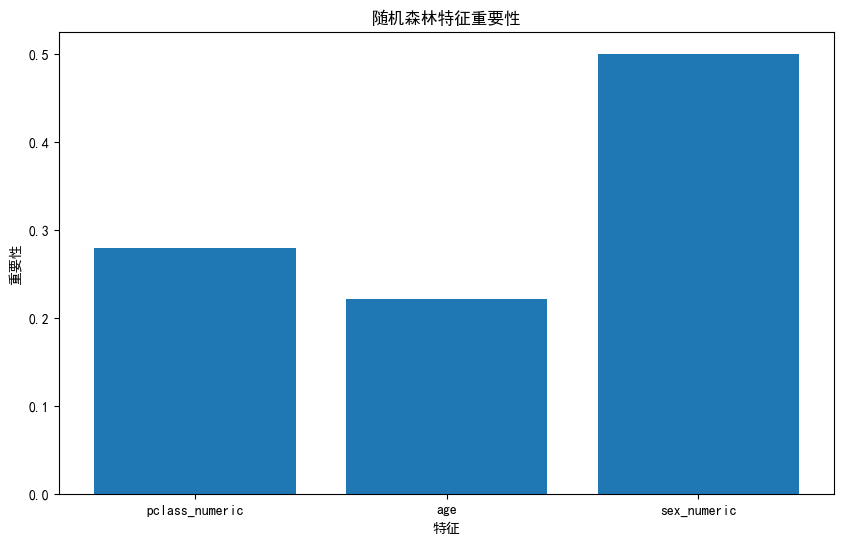

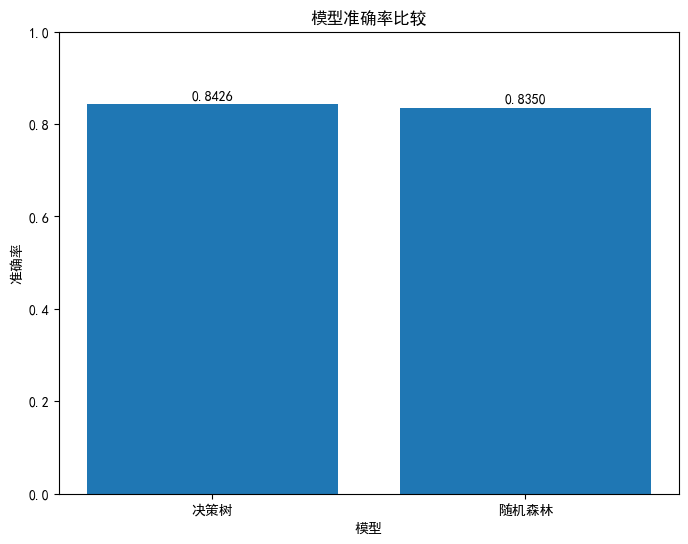

决策树与随机森林模型比较:


比较项,决策树,随机森林
准确率,0.8426,0.8350
过拟合风险,高,低
训练速度,快,慢
预测速度,快,中等
可解释性,强,弱
处理高维数据能力,一般,强
处理噪声数据能力,弱,强
参数调优复杂度,简单,复杂


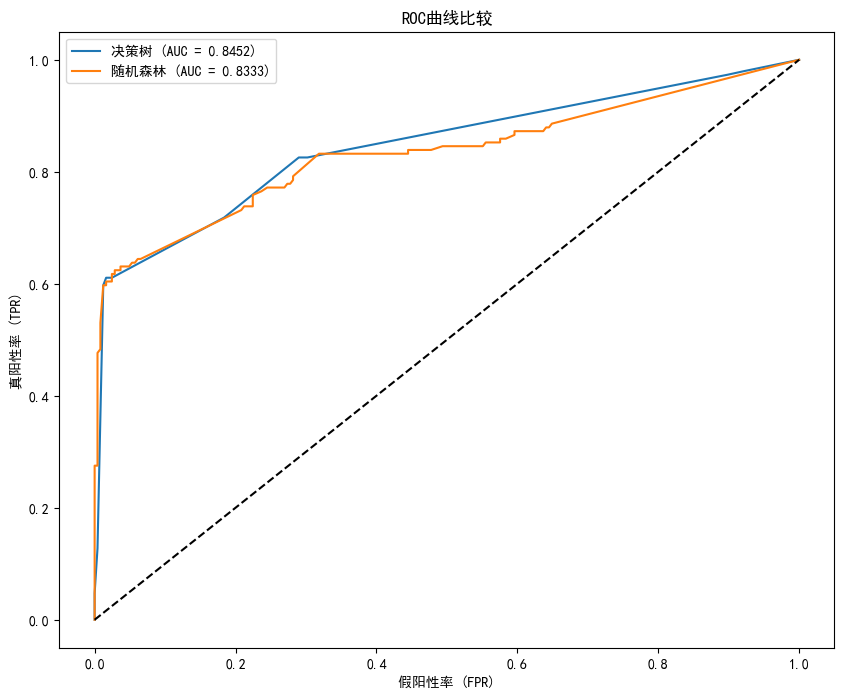


模型比较总结:
1. 准确率: 随机森林通常比单一决策树表现更好，因为它结合了多个决策树的预测结果。
2. 过拟合: 随机森林通过集成学习减少了过拟合风险，而单一决策树容易过拟合。
3. 可解释性: 决策树模型更容易解释，而随机森林是一个黑盒模型。
4. 计算复杂度: 决策树训练和预测速度更快，随机森林需要更多计算资源。
5. 特征处理: 随机森林对高维数据和噪声数据有更好的处理能力。


In [11]:
# 随机森林模型
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林模型
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=42,bootstrap=True)

# 训练模型
rf_classifier.fit(X_train, y_train)

# 预测
rf_pred = rf_classifier.predict(X_test)

# 评估随机森林模型
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"随机森林模型准确率: {rf_accuracy:.4f}")

# 打印分类报告
print("\n随机森林分类报告:")
print(classification_report(y_test, rf_pred))

# 打印混淆矩阵
print("\n随机森林混淆矩阵:")
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print(rf_conf_matrix)

# 随机森林特征重要性
rf_feature_importance = rf_classifier.feature_importances_

# 可视化随机森林特征重要性
plt.figure(figsize=(10, 6))
plt.bar(feature_names, rf_feature_importance)
plt.title('随机森林特征重要性')
plt.xlabel('特征')
plt.ylabel('重要性')
plt.show()

# 比较决策树和随机森林的准确率
models = ['决策树', '随机森林']
accuracies = [accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.title('模型准确率比较')
plt.xlabel('模型')
plt.ylabel('准确率')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()
# 比较决策树和随机森林的优缺点分析

# 创建一个表格来比较两种模型
import pandas as pd
from IPython.display import display, HTML

# 创建比较数据
comparison_data = {
    '比较项': ['准确率', '过拟合风险', '训练速度', '预测速度', '可解释性', '处理高维数据能力', '处理噪声数据能力', '参数调优复杂度'],
    '决策树': [f'{accuracy:.4f}', '高', '快', '快', '强', '一般', '弱', '简单'],
    '随机森林': [f'{rf_accuracy:.4f}', '低', '慢', '中等', '弱', '强', '强', '复杂']
}

# 创建DataFrame
comparison_df = pd.DataFrame(comparison_data)

# 显示比较表格
print("决策树与随机森林模型比较:")
display(HTML(comparison_df.to_html(index=False)))

# 可视化两个模型的ROC曲线比较
from sklearn.metrics import roc_curve, auc

# 获取决策树的预测概率
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
# 获取随机森林的预测概率
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]

# 计算ROC曲线
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# 计算AUC
dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

# 绘制ROC曲线
plt.figure(figsize=(10, 8))
plt.plot(dt_fpr, dt_tpr, label=f'决策树 (AUC = {dt_auc:.4f})')
plt.plot(rf_fpr, rf_tpr, label=f'随机森林 (AUC = {rf_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # 对角线
plt.xlabel('假阳性率 (FPR)')
plt.ylabel('真阳性率 (TPR)')
plt.title('ROC曲线比较')
plt.legend()
plt.show()

# 总结比较
print("\n模型比较总结:")
print("1. 准确率: 随机森林通常比单一决策树表现更好，因为它结合了多个决策树的预测结果。")
print("2. 过拟合: 随机森林通过集成学习减少了过拟合风险，而单一决策树容易过拟合。")
print("3. 可解释性: 决策树模型更容易解释，而随机森林是一个黑盒模型。")
print("4. 计算复杂度: 决策树训练和预测速度更快，随机森林需要更多计算资源。")
print("5. 特征处理: 随机森林对高维数据和噪声数据有更好的处理能力。")
